In [144]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os
import cv2

In [142]:
ANNOTATION_PATH = '/Users/wolf_tungsten/dota/train/label'
IMAGE_PATH = '/Users/wolf_tungsten/dota/train/images/images'

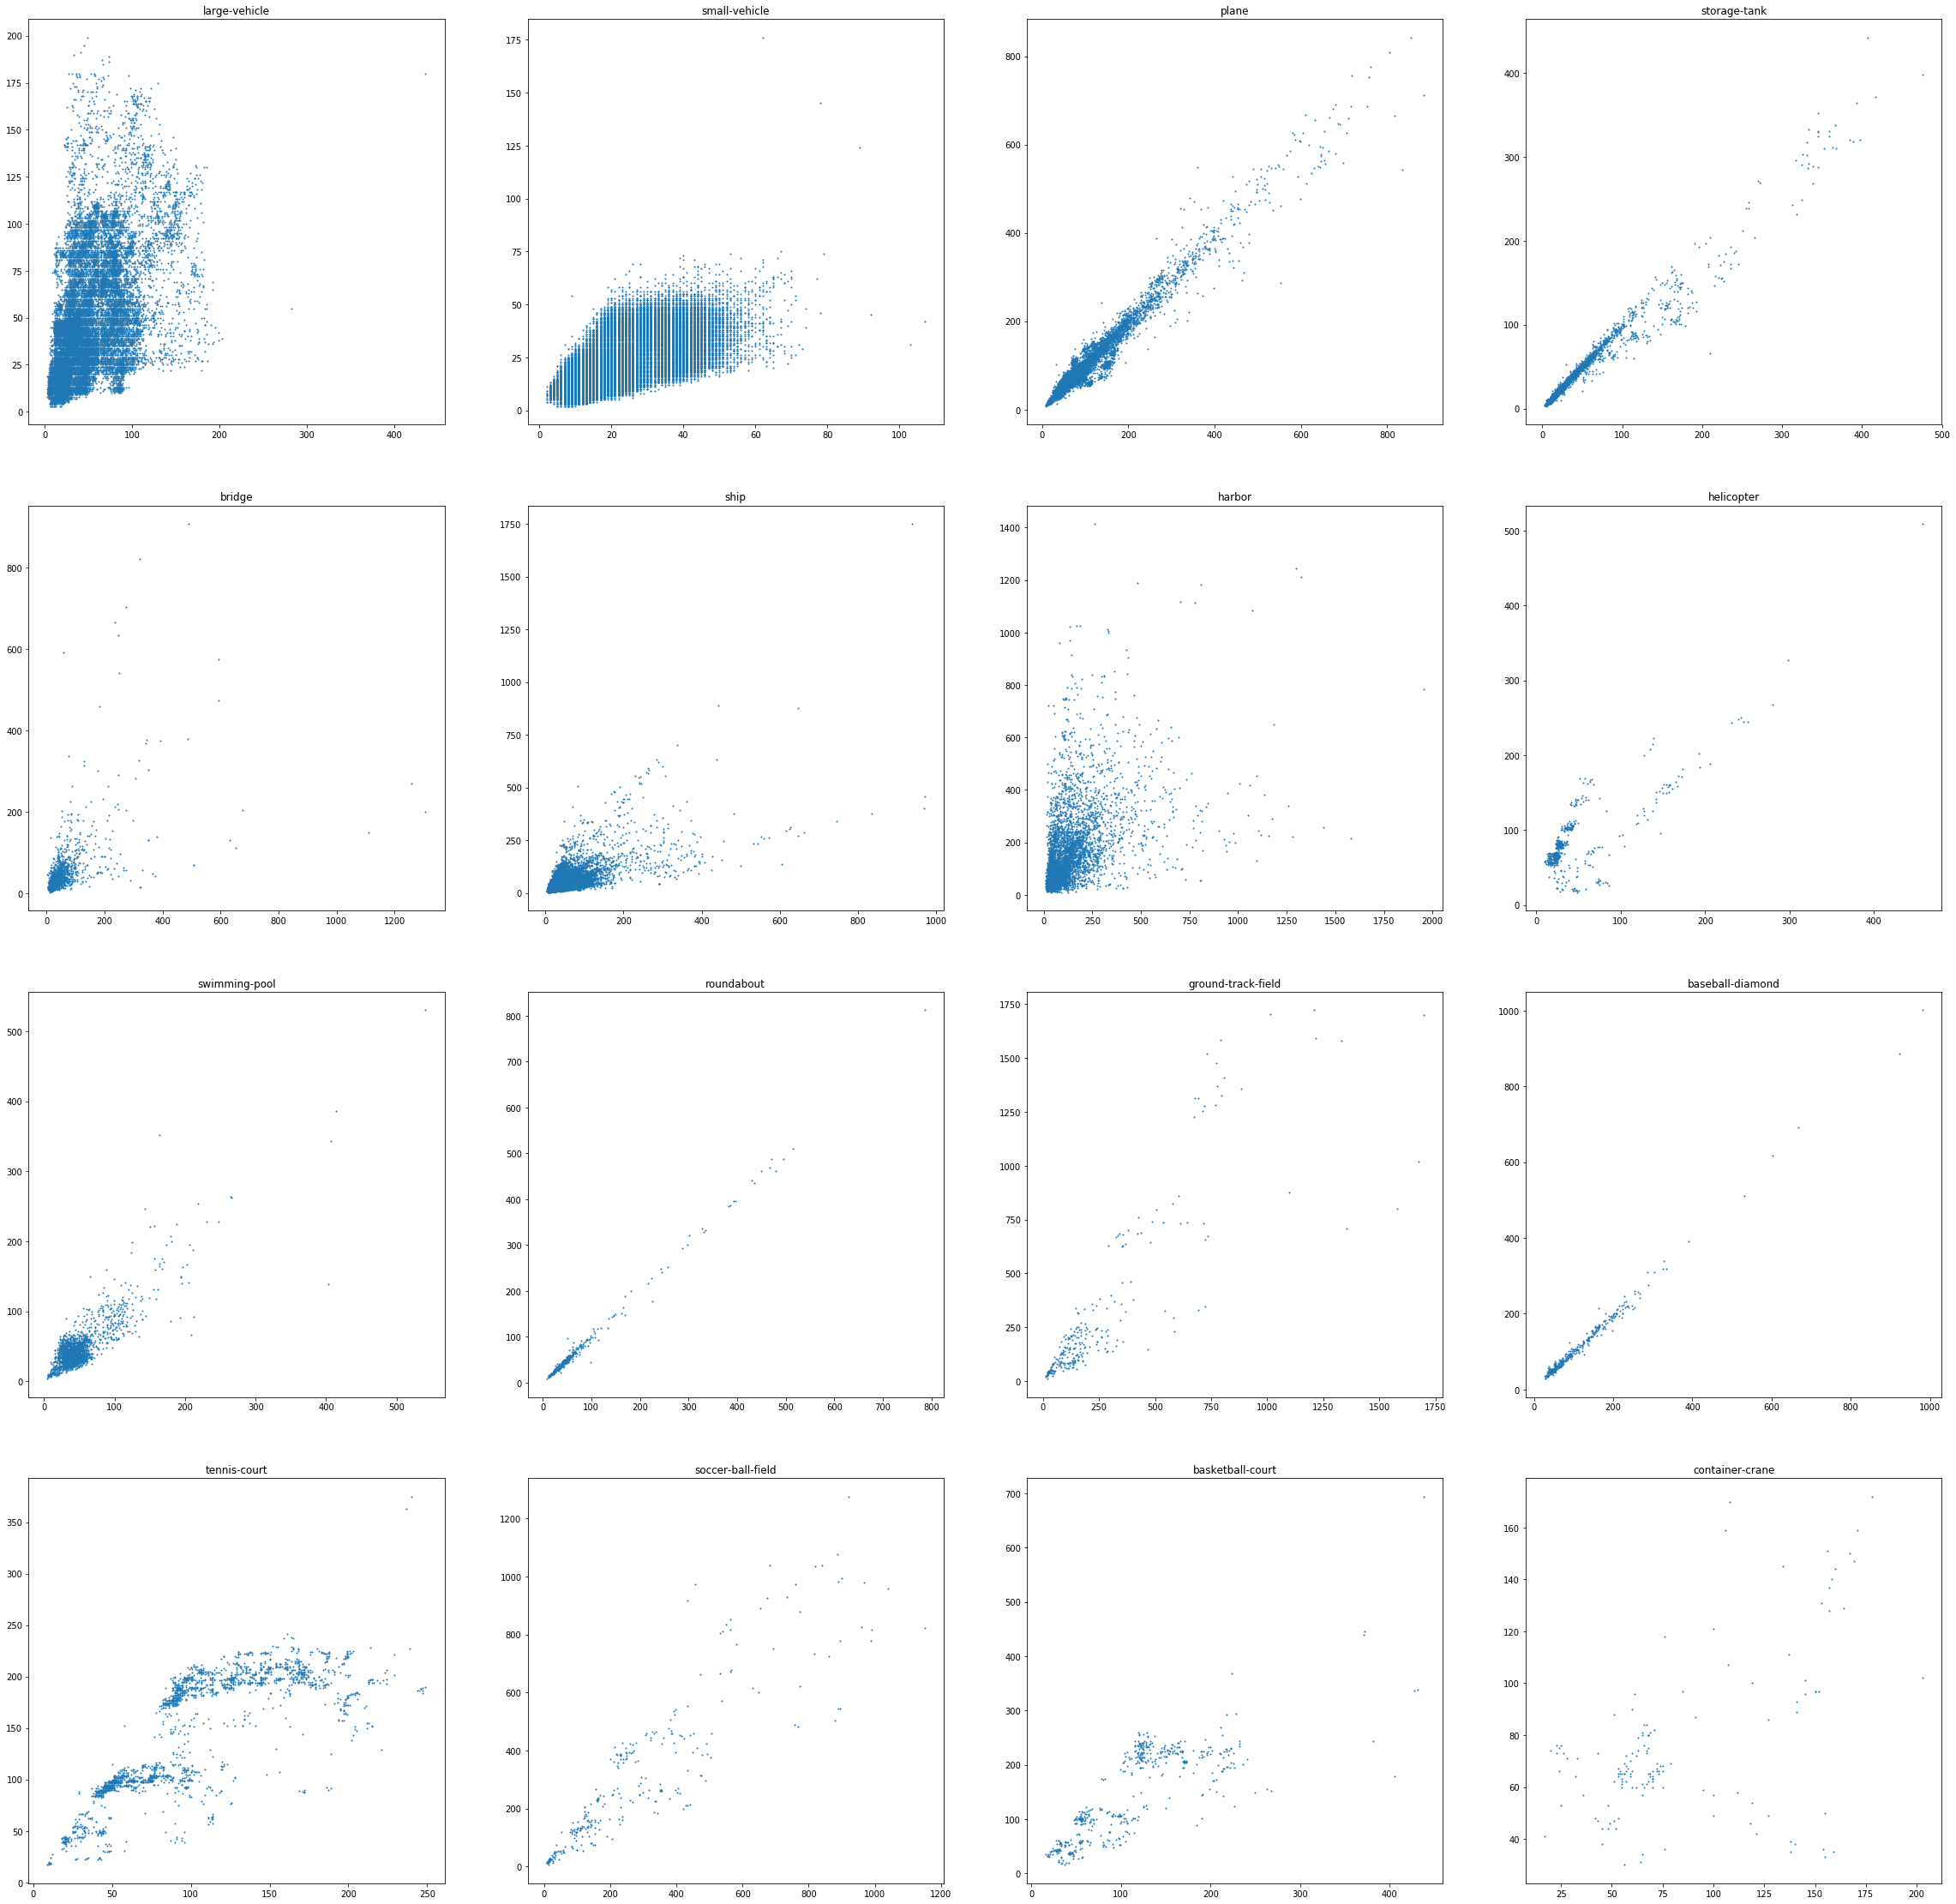

In [153]:
category_area = {}
category_width = {}
category_height = {}

for i in os.walk(ANNOTATION_PATH):
    for filename in i[2]:
        if not filename.startswith('P'):
            continue
        filename = os.path.join(ANNOTATION_PATH, filename)
        with open(filename, 'r') as f:
            targets = f.readlines()[2:-1]
            for target in targets:
                info = target.split(' ')
                area = (float(info[4]) - float(info[0])) * (float(info[5]) - float(info[1]))
                category = info[8]
                if category not in category_area:
                    category_area[category] = []
                if category not in category_width:
                    category_width[category] = []
                if category not in category_height:
                    category_height[category] = []
                category_area[category].append(area)
                category_width[category].append((float(info[4]) - float(info[0])))
                category_height[category].append((float(info[5]) - float(info[1])))

plt.figure(figsize=(40, 40))

subplt_map = {}

start = 1

for category in category_area:
    subplt = plt.subplot(4, 4, start)
    start += 1
    subplt.scatter(np.array(category_width[category]), np.array(category_height[category]), s=1)
    #subplt.axis([0, 800, 0, 800])
    subplt.set_title(category)
    
plt.show()

In [150]:
image_width = []
image_height = []
for i in os.walk(IMAGE_PATH):
    for filename in i[2]:
        if not filename.startswith('P'):
            continue
        filename = os.path.join(IMAGE_PATH, filename)
        img = cv2.imread(filename)
        image_width.append(img.shape[0])
        image_height.append(img.shape[1])

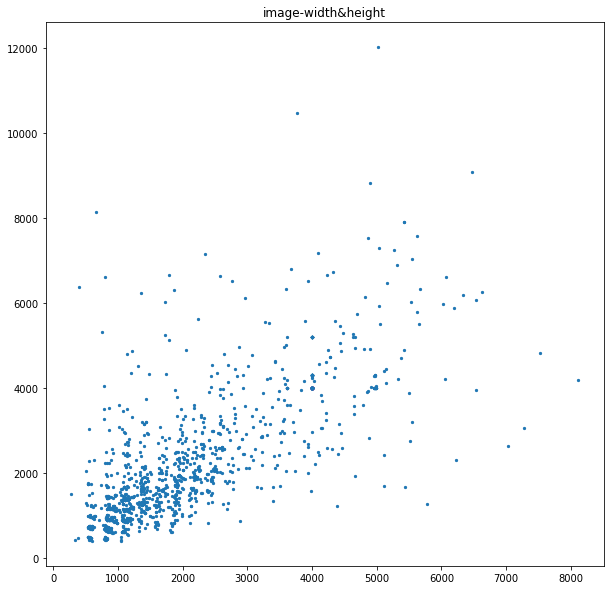

In [151]:
plt.figure(figsize=(10, 10))
plt.scatter(np.array(image_width), np.array(image_height), s=5)
plt.title('image-width&height')
plt.show()